# Instalação de Bibliotecas

In [142]:
pip install faker


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\21AI\França\21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [143]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\21AI\França\21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [144]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\21AI\França\21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [145]:
pip install folium

You should consider upgrading via the 'c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\21AI\França\21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [146]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\21AI\França\21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Bibliotecas

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import datetime as dt
import random
import folium

fake = Faker()

# Análises

## Imóveis

In [148]:
# Initialize Faker to a constant seed for reproducibility
fake = Faker()
Faker.seed(0)
np.random.seed(0)

num_linhas = 5000

# Creating the imoveis DataFrame
imoveis = pd.DataFrame({
    'imovel_id': range(1, num_linhas + 1),
    'localizacao': [fake.address() for _ in range(num_linhas)],
    'tipo': np.random.choice(['Casa', 'Apartamento'], num_linhas),
    'tamanho': np.random.normal(120, 40, num_linhas).clip(20),  # Minimum size of 20m²
    'quartos': np.random.randint(1, 5, num_linhas),  # Between 1 and 4 bedrooms
    'suites': np.random.randint(0, 5, num_linhas),  # Between 0 and 4 suites
    'vendido': np.random.choice([0, 1], num_linhas),  # 0 for not sold, 1 for sold
    'alugado': np.random.choice([0, 1], num_linhas),  # 0 for not rented, 1 for rented
    'vagaGaragem': np.where(np.random.choice(['Casa', 'Apartamento'], num_linhas) == 'Apartamento', np.random.choice([0, 1], num_linhas), 0),
    'precoVenda': np.random.normal(500000, 150000, num_linhas).clip(100000),  # Minimum price of R$100.000
    'precoAluguel': np.random.normal(2000, 500, num_linhas).clip(500)  # Minimum rent of R$500
})

# Adjusting suites to not exceed the number of bedrooms
imoveis['suites'] = imoveis.apply(lambda row: min(row['suites'], row['quartos']), axis=1)

# Adjusting the logic for sold/rented
for index, row in imoveis.iterrows():
    if row['vendido'] == 1:
        imoveis.at[index, 'alugado'] = 0
    elif row['alugado'] == 1:
        imoveis.at[index, 'vendido'] = 0

# Function to determine the purpose of the property
def determinar_finalidade(row):
    if row['vendido'] == 1:
        return 'Compra'
    elif row['alugado'] == 1:
        return 'Aluguel'
    else:
        return np.random.choice(['Compra', 'Aluguel'])

# Applying the function to the DataFrame
imoveis['Finalidade'] = imoveis.apply(determinar_finalidade, axis=1)

# Define the start and end date for lead generation as one year before the current date
start_date = dt.datetime.now() - pd.DateOffset(years=1)
end_date = dt.datetime.now()

# Function to generate a random date between the start date and the end date
def random_date(start, end):
    return start + pd.Timedelta(seconds=np.random.randint(0, int((end - start).total_seconds())))

# Apply the function to generate 'sold_date'
imoveis['sold_date'] = np.where(imoveis['vendido'] == 1, 
                                imoveis.apply(lambda row: random_date(start_date, end_date), axis=1),
                                pd.NaT)
imoveis['sold_date'] = pd.to_datetime(imoveis['sold_date']).dt.normalize()

# Setting a fixed number of days (e.g., 90 days) before the sold_date or the current date for the announcement date
fixed_days_before = 90

# Function to set the 'data_anuncio' as a fixed period before 'sold_date' or the current date
def set_fixed_data_anuncio(row):
    if row['vendido'] == 1 and pd.notna(row['sold_date']):
        return row['sold_date'] - pd.DateOffset(days=fixed_days_before)
    else:
        return end_date - pd.DateOffset(days=fixed_days_before)

# Atualizando 'data_anuncio' para ser sempre 17 dias antes de 'sold_date'
imoveis['data_anuncio'] = imoveis['sold_date'] - pd.DateOffset(days=17)

# Adjusting the 'precoAluguel' field to be NaN for properties that are not for rent
imoveis.loc[imoveis['alugado'] == 0, 'precoAluguel'] = np.nan

# Display the first few rows of the DataFrame for verification
imoveis.head()

,imovel_id,localizacao,tipo,tamanho,quartos,suites,vendido,alugado,vagaGaragem,precoVenda,precoAluguel,Finalidade,sold_date,data_anuncio
0,1,"48764 Howard Forge Apt. 421\nVanessaside, VT 7...",Casa,102.756146,1,1,1,0,0,309572.704254,NaN,Compra,2023-02-18,2023-02-01
1,2,"PSC 4115, Box 7815\nAPO AA 41945",Apartamento,142.910055,3,2,1,0,0,253668.567428,NaN,Compra,2023-07-28,2023-07-11
2,3,"778 Brown Plaza\nNorth Jenniferfurt, VT 88077",Apartamento,147.102281,2,1,0,1,1,545880.738194,1658.39756,Aluguel,NaT,NaT
3,4,"3513 John Divide Suite 115\nRodriguezside, LA ...",Casa,172.287354,1,1,1,0,0,498069.441070,NaN,Compra,2023-04-15,2023-03-29
4,5,"398 Wallace Ranch Suite 593\nIvanburgh, AZ 80818",Apartamento,101.302360,2,0,0,0,0,105593.667949,NaN,Aluguel,NaT,NaT


## Clientes

In [149]:
# Ajuste o número de linhas para 5000
num_linhas = 5000

# Exemplo para gerar dados de clientes
clientes = pd.DataFrame({
    'cliente_id': range(1, num_linhas + 1),
    'faixaEtaria': np.random.choice(['20-30', '30-40', '40-50', '50+'], num_linhas),
    'Sexo': np.random.choice(['Masculino', 'Feminino'], num_linhas),
    # Parâmetros de Funil de Marketing
    'Origem': np.random.choice(['Instagram', 'Facebook', 'Email', 'Site', 'Outros'], num_linhas),
    'LP': np.random.choice([0, 1], num_linhas),  # 0 para não, 1 para sim
    'Formulario': np.random.choice([0, 1], num_linhas)  # 0 para não, 1 para sim
})

# Se LP = 0 & Formulario = 1, então LP = 1
for index, row in clientes.iterrows():
    if row['Formulario'] == 1 and row['LP'] == 0:
        clientes.at[index, 'LP'] = 1

# Define the start date for lead generation as one year before the current date
lead_start_date = dt.datetime.now() - pd.DateOffset(years=1)
lead_end_date = dt.datetime.now()

# Function to generate a random date between the start date and the end date
def random_lead_date(start, end):
    return start + pd.Timedelta(seconds=np.random.randint(0, int((end - start).total_seconds())))

# Apply the function to generate lead dates
clientes['lead_date'] = clientes.apply(lambda row: random_lead_date(lead_start_date, lead_end_date), axis=1)
clientes['lead_date'] = clientes['lead_date'].dt.normalize()

# Gerando coordenadas aleatórias dentro do intervalo geográfico de São Paulo
latitudes = np.random.uniform(-23.7, -23.4, num_linhas)
longitudes = np.random.uniform(-46.9, -46.3, num_linhas)

# Adicionando as coordenadas ao DataFrame
clientes['latitude'] = latitudes
clientes['longitude'] = longitudes

# Função para classificar os leads
def classificar_lead(row):
    if row['LP'] == 0 and row['Formulario'] == 0:
        return 'Frio'
    elif row['LP'] == 1 and row['Formulario'] == 0:
        return 'Morno'
    elif row['LP'] == 1 and row['Formulario'] == 1:
        return 'Quente'
    else:
        return 'Indefinido'  # Para qualquer outra combinação

# Aplicar a função para criar a coluna condicional
clientes['Classificacao_Lead'] = clientes.apply(classificar_lead, axis=1)


# Exibindo as primeiras linhas do DataFrame para verificação
clientes.head()

,cliente_id,faixaEtaria,Sexo,Origem,LP,Formulario,lead_date,latitude,longitude,Classificacao_Lead
0,1,50+,Masculino,Facebook,1,1,2023-06-11,-23.632710,-46.488378,Quente
1,2,50+,Masculino,Instagram,0,0,2023-06-24,-23.526590,-46.885172,Frio
2,3,50+,Feminino,Outros,1,0,2023-04-29,-23.477960,-46.515834,Morno
3,4,20-30,Masculino,Outros,1,0,2023-11-22,-23.660656,-46.725058,Morno
4,5,40-50,Feminino,Outros,0,0,2023-10-29,-23.679136,-46.846400,Frio


### Gráfico 1 

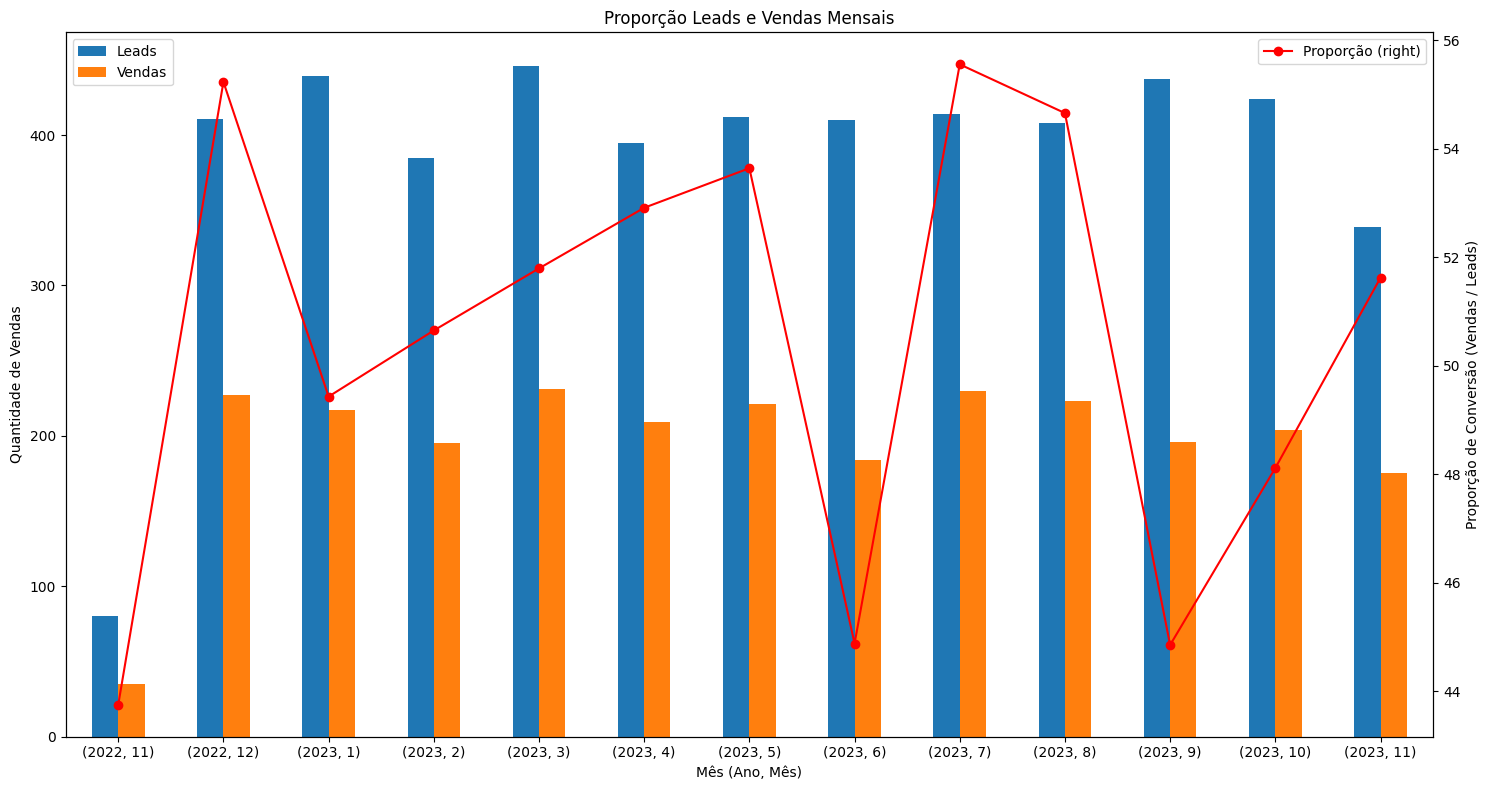

In [161]:
import plotly.express as px
# Contar leads por mês
leads_per_month = clientes['lead_date'].groupby([clientes['lead_date'].dt.year, clientes['lead_date'].dt.month]).count()

# Contar vendas por mês
sales_per_month = imoveis[imoveis['vendido'] == 1]['sold_date'].groupby([imoveis['sold_date'].dt.year, imoveis['sold_date'].dt.month]).count()

# Criar DataFrame para o gráfico
plot_data = pd.DataFrame({
    'Leads': leads_per_month,
    'Vendas': sales_per_month
})

# Preencher valores NaN com 0   
plot_data = plot_data.fillna(0)

plot_data['Proporção'] = np.where(plot_data['Leads'] > 0, (plot_data['Vendas'] / plot_data['Leads']) * 100, 0)

# Criar o gráfico de barras com a proporção
fig, ax = plt.subplots(figsize=(15, 8))
plot_data[['Leads', 'Vendas']].plot(kind='bar', ax=ax)
plot_data['Proporção'].plot(kind='line', ax=ax, secondary_y=True, color='red', marker='o')

# Configurações do gráfico
ax.set_title('Proporção Leads e Vendas Mensais')
ax.set_xlabel('Mês (Ano, Mês)')
ax.set_ylabel('Quantidade de Vendas')
ax.right_ax.set_ylabel('Proporção de Conversão (Vendas / Leads)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [172]:
leads_per_month
sales_per_month

df = pd.DataFrame({
    'Leads': leads_per_month,
    'Vendas': sales_per_month
})

df['proporcao'] = np.where(df['Leads'] > 0, (df['Vendas'] / df['Leads']) * 100, 0)

df['date'] = df.index

df['date'] = df['date'].apply(lambda x: f"{int(x[0])}-{int(x[1])}")

df['date'] = pd.to_datetime(df['date'])

df

Leads  Vendas  proporcao       date
2022 11     80      35  43.750000 2022-11-01
     12    411     227  55.231144 2022-12-01
2023 1     439     217  49.430524 2023-01-01
     2     385     195  50.649351 2023-02-01
     3     446     231  51.793722 2023-03-01
     4     395     209  52.911392 2023-04-01
     5     412     221  53.640777 2023-05-01
     6     410     184  44.878049 2023-06-01
     7     414     230  55.555556 2023-07-01
     8     408     223  54.656863 2023-08-01
     9     437     196  44.851259 2023-09-01
     10    424     204  48.113208 2023-10-01
     11    339     175  51.622419 2023-11-01

### Gráfico 2

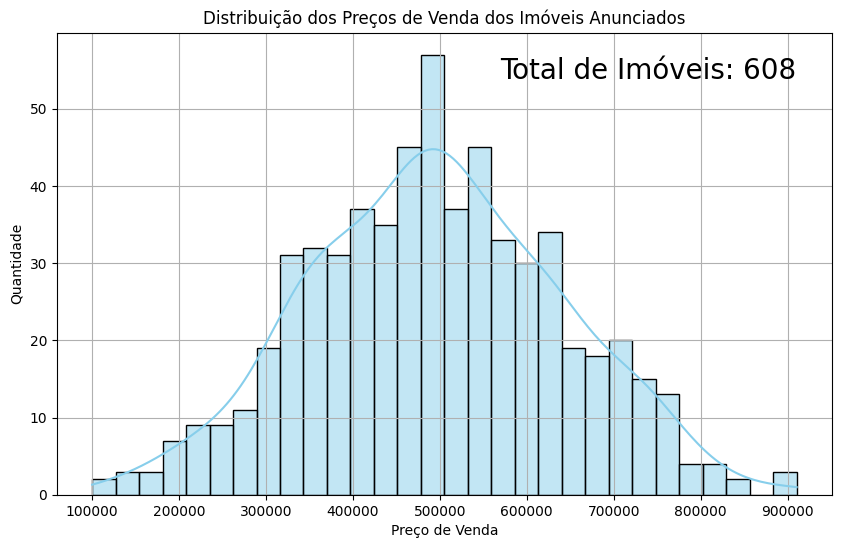

In [ ]:
# Filtrando imóveis que estão à venda e ainda não foram vendidos
imoveis_a_venda = imoveis[(imoveis['vendido'] == 0) & (imoveis['Finalidade'] == 'Compra')]

# Contagem de imóveis na amostra
total_imoveis = len(imoveis_a_venda)

# Criando um histograma com uma linha KDE
plt.figure(figsize=(10, 6))
sns.histplot(imoveis_a_venda['precoVenda'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Adicionando a legenda com a quantidade de imóveis
plt.text(x=max(imoveis_a_venda['precoVenda']), y=0.9*plt.gca().get_ylim()[1], s=f'Total de Imóveis: {total_imoveis}', 
         horizontalalignment='right', fontsize=20, color='black')

# Configurando título e eixos
plt.title('Distribuição dos Preços de Venda dos Imóveis Anunciados')
plt.xlabel('Preço de Venda')
plt.ylabel('Quantidade')
plt.grid(True)

# Exibir o gráfico
plt.show()

### Dado 1 - Leads do Quarter Atual Comparado ao Quarter Anterior

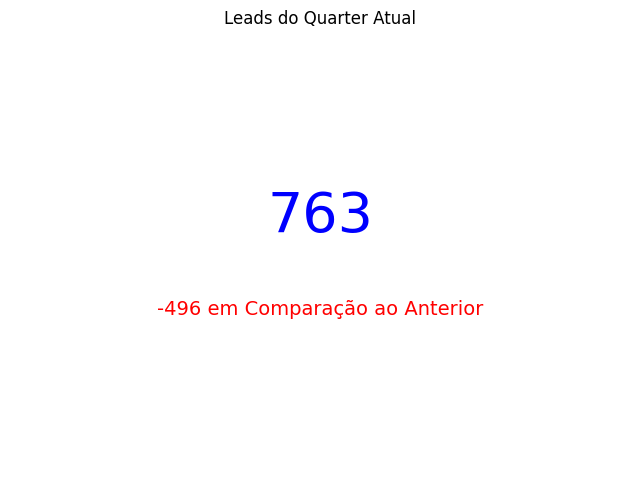

In [ ]:
# Obter o quarter atual
current_quarter = pd.Timestamp.now().quarter
current_year = pd.Timestamp.now().year

# Obter o quarter anterior
if current_quarter == 1:
    previous_quarter = 4
    previous_year = current_year - 1
else:
    previous_quarter = current_quarter - 1
    previous_year = current_year

# Filtrar leads do quarter atual
leads_current_quarter = clientes[(clientes['lead_date'].dt.year == current_year) & (clientes['lead_date'].dt.quarter == current_quarter)]

# Filtrar leads do quarter anterior
leads_previous_quarter = clientes[(clientes['lead_date'].dt.year == previous_year) & (clientes['lead_date'].dt.quarter == previous_quarter)]

# Calcular a quantidade de leads para cada quarter
qtd_leads_current_quarter = len(leads_current_quarter)
qtd_leads_previous_quarter = len(leads_previous_quarter)

# Calcular a diferença entre os quarters
diferenca = qtd_leads_current_quarter - qtd_leads_previous_quarter

# Criando o gráfico para exibir a quantidade de lead    s do quarter atual e a diferença
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.6, f'{qtd_leads_current_quarter}', ha='center', va='center', fontsize=40, color='blue')
plt.text(0.5, 0.4, f'{diferenca} em Comparação ao Anterior', ha='center', va='center', fontsize=14, color='red' if diferenca < 0 else 'green')
plt.title('Leads do Quarter Atual')
plt.axis('off')  # Desligar o eixo
plt.show()

### Dado 2 - CAC Atual Comparado ao do Mês Anterior

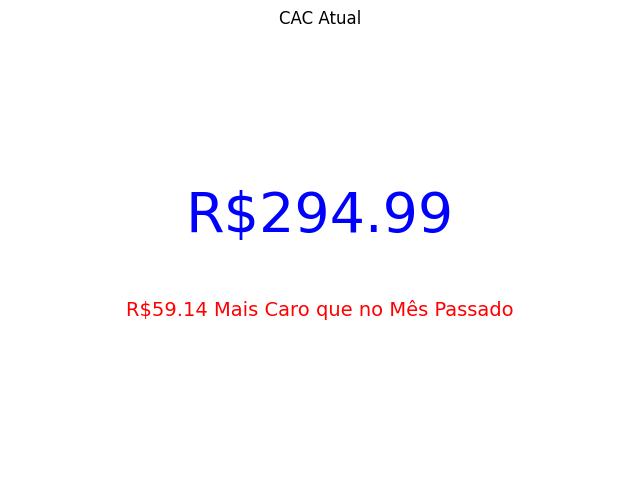

235.8490566037736

In [ ]:
# Definindo custos de marketing e vendas (exemplo)
custo_marketing_vendas = 100000  # Exemplo: R$100.000 por mês

# Data atual e data do mês anterior
data_atual = pd.Timestamp.now()
data_anterior = data_atual - pd.DateOffset(months=1)

# Calculando o número de novos clientes no mês atual e no mês anterior
novos_clientes_mes_atual = len(clientes[clientes['lead_date'].dt.to_period('M') == data_atual.to_period('M')])
novos_clientes_mes_anterior = len(clientes[clientes['lead_date'].dt.to_period('M') == data_anterior.to_period('M')])

# Calculando o CAC atual e do mês anterior
CAC_atual = custo_marketing_vendas / novos_clientes_mes_atual if novos_clientes_mes_atual > 0 else float('inf')
CAC_anterior = custo_marketing_vendas / novos_clientes_mes_anterior if novos_clientes_mes_anterior > 0 else float('inf')

# Plotando o valor do CAC atual e a comparação com o mês anterior
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.6, f'R${CAC_atual:.2f}', ha='center', va='center', fontsize=40, color='blue')
diferenca_CAC = CAC_atual - CAC_anterior
plt.text(0.5, 0.4, f'R${diferenca_CAC:.2f} Mais Caro que no Mês Passado' if diferenca_CAC >  0 else f'R${diferenca_CAC:.2f} Mais Barato que no Mês Passado'  , ha='center', va='center', fontsize=14, color='red' if diferenca_CAC >  0 else 'green')
plt.title('CAC Atual')
plt.axis('off')  # Desligar o eixo
plt.show()

CAC_anterior

### Dado 3 - ROAS (Return on Advertisement Spent)

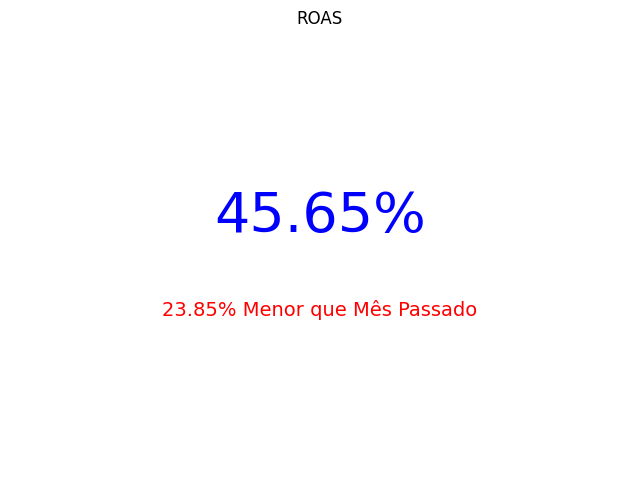

In [ ]:
# Suponha que 'clientes' e 'imoveis' sejam seus DataFrames
custo_marketing_vendas = 60000000  # Exemplo: R$100.000 por mês

# Receita dos imóveis vendidos no mês atual e anterior
data_atual = pd.Timestamp.now()
data_anterior = data_atual - pd.DateOffset(months=1)

receita_mes_atual = imoveis[(imoveis['vendido'] == 1) & (imoveis['sold_date'].dt.to_period('M') == data_atual.to_period('M'))]['precoVenda'].sum()
receita_mes_anterior = imoveis[(imoveis['vendido'] == 1) & (imoveis['sold_date'].dt.to_period('M') == data_anterior.to_period('M'))]['precoVenda'].sum()

# Calculando o ROI atual e do mês anterior
ROI_atual = (receita_mes_atual - custo_marketing_vendas) / custo_marketing_vendas * 100
ROI_anterior = (receita_mes_anterior - custo_marketing_vendas) / custo_marketing_vendas * 100

# Plotando o valor do ROI atual e a comparação com o mês anterior
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.6, f'{ROI_atual:.2f}%', ha='center', va='center', fontsize=40, color='blue')
diferenca_ROI = ROI_atual - ROI_anterior
plt.text(0.5, 0.4, f'{abs(diferenca_ROI):.2f}% Menor que Mês Passado' if diferenca_ROI <  0 else f'R${diferenca_ROI:.2f} Maior que Mês Passado', ha='center', va='center', fontsize=14, color='red' if diferenca_ROI < 0 else 'green')
plt.title('ROAS')
plt.axis('off')
plt.show()

### Dado 4 - Days On Market

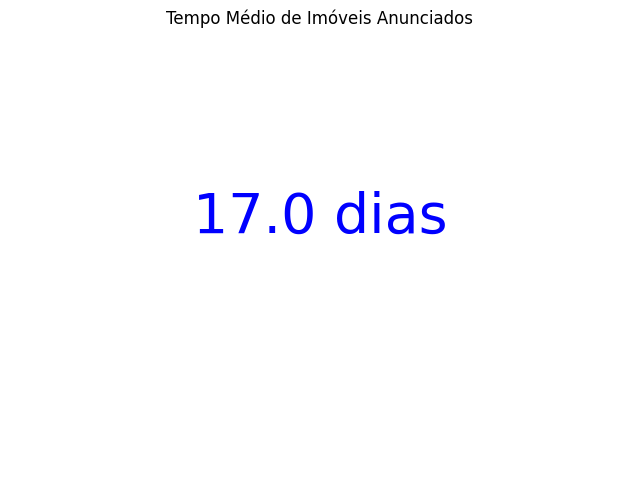

In [ ]:
# Revisando as datas para garantir que 'data_anuncio' é anterior a 'sold_date'
# e calculando a diferença de dias apenas para imóveis vendidos
imoveis['Days_On_Market'] = imoveis.apply(lambda row: (row['sold_date'] - row['data_anuncio']).days if row['vendido'] == 1 and row['data_anuncio'] <= row['sold_date'] else np.nan, axis=1)

# Calculando a média de Days On Market para os imóveis vendidos
average_days_on_market = imoveis['Days_On_Market'].dropna().mean()
average_days_on_market

# Plotting the average Days On Market
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.6, f'{average_days_on_market} dias', ha='center', va='center', fontsize=40, color='blue')
plt.title('Tempo Médio de Imóveis Anunciados')
plt.axis('off')
plt.show()

In [ ]:
# Criar o mapa centralizado em São Paulo
mapa = folium.Map(location=[-23.55, -46.63], zoom_start=11)  # Coordenadas aproximadas do centro de São Paulo

# Adicionando pontos ao mapa
for _, row in clientes.iterrows():
    # Escolher a cor com base em alguma métrica ou categoria. Exemplo: 'Sexo'
    if row['Sexo'] == 'Masculino':
        marker_color = 'blue'
    else:
        marker_color = 'red'

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=marker_color,
        fill=True,
        fill_color=marker_color
    ).add_to(mapa)

# Exibir o mapa
mapa

### Gráfico 4

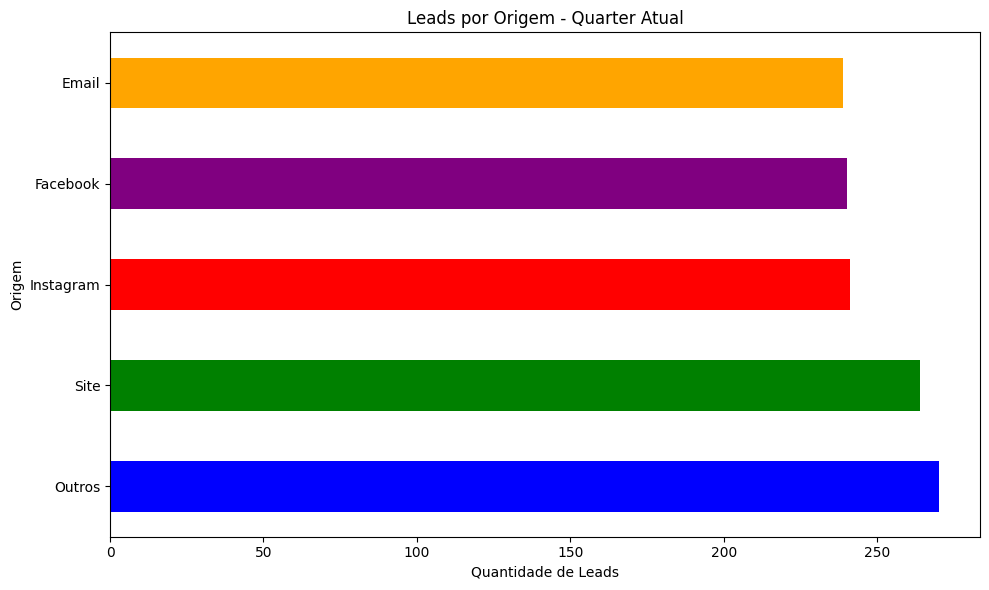

In [ ]:
# Definir o quarter atual
quarter_atual = pd.Timestamp.now().quarter

# Filtrar os dados para o quarter atual
leads_quarter_atual = clientes[clientes['lead_date'].dt.quarter == quarter_atual]

# Contar leads por origem
leads_por_origem = leads_quarter_atual['Origem'].value_counts()

# Definir uma lista de cores
cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Criar o gráfico de barras horizontal com cores diferentes
plt.figure(figsize=(10, 6))
leads_por_origem.plot(kind='barh', color=cores[:len(leads_por_origem)])
plt.title('Leads por Origem - Quarter Atual')
plt.xlabel('Quantidade de Leads')
plt.ylabel('Origem')
plt.tight_layout()


plt.show()

### Gráfico 5

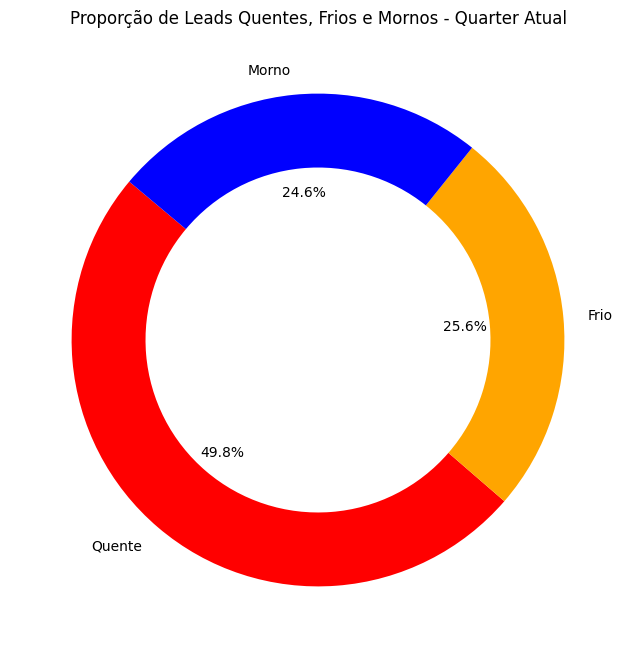

In [ ]:
# Filtrar dados para o quarter atual
quarter_atual = pd.Timestamp.now().quarter
leads_quarter_atual = clientes[clientes['lead_date'].dt.quarter == quarter_atual]

# Contar a quantidade de leads quentes, frios e mornos
contagem_leads = leads_quarter_atual['Classificacao_Lead'].value_counts()

# Definir cores para cada tipo de lead
cores = ['red', 'orange', 'blue']

# Criar gráfico de pizza aberto com as cores específicas
plt.figure(figsize=(8, 8))
contagem_leads.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=cores, wedgeprops=dict(width=0.3))
plt.title('Proporção de Leads Quentes, Frios e Mornos - Quarter Atual')
plt.ylabel('')  # Remover o label do eixo y


plt.show()

In [ ]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\21AI\França\21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# Supondo que o DataFrame 'clientes' esteja definido como anteriormente
# Definindo o quarter atual
current_quarter = pd.Timestamp.now().quarter
current_year = pd.Timestamp.now().year

# Filtrando clientes deste quarter
clientes_quarter_atual = clientes[(clientes['lead_date'].dt.year == current_year) &
                                (clientes['lead_date'].dt.quarter == current_quarter)]

# Contando clientes de cada etapa do funil
total_clientes = len(clientes_quarter_atual)
clientes_LP = len(clientes_quarter_atual[clientes_quarter_atual['LP'] == 1])
clientes_LP_Form = len(clientes_quarter_atual[(clientes_quarter_atual['LP'] == 1) &
                                            (clientes_quarter_atual['Formulario'] == 1)])

funil_cores = ['#007bff', '#ffc107', '#dc3545']

# Criando o gráfico de funil com cores específicas para cada etapa
data = dict(
    number = ['Total Clientes', 'Foram ao Site', 'Preencheram o Formulário'],
    stage = [total_clientes, clientes_LP, clientes_LP_Form])

fig = px.funnel(
    data,
    x = 'number',
    y = 'stage',
)


